#Data Analyst Assignment

## Introduction

You are working with a US retail customer on a pilot deployment.  They are using technology to track their merchandise throughout their supply chain.  The flow of their supply is:

*   **DC 1:**  Orders are filled and palletized.
*   **Truck:** Pallets travel from the DC 1 to DC 2 via semi-truck.
*   **DC 2:**  Pallets are unloaded, and additional merchandise may be added.  They are then reloaded onto a new truck.
*   **Truck:** Pallets travel from DC 2 to the Store.
*   **Store:** Pallets are unloaded, cases are removed, and stocked, and the empty cases are left behind the building awaiting pickup.

Your job is to dig into the data and find compelling insights to show the value fo the technology and help move the contract from a pilot into a full scaled deployment.



---

## Part 0: Imports

Import necessary packages and

In [ ]:
# YOUR CODE HERE:
import pandas as pd

# Paso 0: Importar los paquetes necesarios

# Importamos el conjunto de datos
pd.read_excel('/content/Assignment_1.xlsx')
df = pd.read_excel('Assignment_1.xlsx')

# Mostrar las primeras filas del DataFrame para tener una idea de los datos
print("Primeras filas del DataFrame:")
print(df.head())

# Resumen estadístico de las columnas numéricas
print("\nResumen estadístico de las columnas numéricas:")
print(df.describe())

# Información del DataFrame
print("\nInformación del DataFrame:")
print(df.info())

Primeras filas del DataFrame:
  asset_type  asset_id                           tag_id  Site            Zone  \
0       tote         2  (01)00850027865010(21)0082T0219  DC 1  dock_doors_DC1   
1       tote         2  (01)00850027865010(21)0082T0219  DC 1  dock_doors_DC1   
2       tote         2  (01)00850027865010(21)0082T0219  DC 1  dock_doors_DC1   
3       tote         2  (01)00850027865010(21)0082T0219  DC 1  dock_doors_DC1   
4       tote         2  (01)00850027865010(21)0082T0670  DC 1  dock_doors_DC1   

      device_id                time_est       lat       lng  Temperature_C  \
0  7F9A8353E973 2022-08-02 11:59:26.628  47.79158 -65.68902           23.0   
1  EC5B0499234F 2022-08-02 12:00:22.660  47.79158 -65.68902           23.0   
2  7F9A8353E973 2022-08-02 12:01:11.234  47.79158 -65.68902           23.0   
3  3D8B2BDB8673 2022-08-02 13:47:58.172  47.79158 -65.68902           23.5   
4  7F9A8353E973 2022-08-02 11:58:55.049  47.79158 -65.68902           23.0   

   Temperature

### Dataset Overview

* Site:  A large space that could contain multiple readers. Ex: DC 1.
* Zone:  Point of interest. These represent areas in which repeaters are installed. These can be thought of as sub-zones.  Ex: Dock Doors.
* Asset ID: The unique ID of the asset.
* Asset Type: The type of thing that is detected (ie tote).
* Device ID: The unique gateway reader ID that detected the device in the zone (there can be multiple in one zone).
* Time est: The time in EST.
* Lon: Longituge
* Lat: Latitude
* Temperature_C / F: Temperature in Celsius, Fahrentheit

## PART 1: Data Overview

### Question 1:

* How many unique cases were we tracking throughout this pilot. (1 pt)
* What are the unique zones we could see (1 pt)
* How many POI's are in each Zone. (2 pts)


In [ ]:
# YOUR CODE HERE:
import pandas as pd

# Paso 0: Importar los paquetes necesarios y cargar el archivo XLSX en un DataFrame
file_path = "/Assignment_1.xlsx"
pd.read_excel('/content/Assignment_1.xlsx')
df = pd.read_excel('Assignment_1.xlsx')

# Pregunta 1: ¿Cuántos casos únicos rastreamos a lo largo de este piloto?
casos_unicos = df['device_id'].nunique()
print("Número de casos únicos rastreados a lo largo del piloto:", casos_unicos)

# ¿Cuáles son las zonas únicas que podríamos ver?
zonas_unicas = df['Zone'].unique()
print("\nZonas únicas que podríamos ver:", zonas_unicas)

# Cuántos puntos de interés hay en cada zona?
puntos_por_zona = df.groupby('Zone')['device_id'].nunique()
print("\nPuntos de interés en cada zona:")
print(puntos_por_zona)

Número de casos únicos rastreados a lo largo del piloto: 38

Zonas únicas que podríamos ver: ['dock_doors_DC1' 'dock_doors_DC2' 'Forklift3_DC1' 'pallet_assembly_DC1'
 'PhoneKit1Bridge' 'PhoneKit2Bridge' 'PhoneKit2GW' 'point_of_sale_Store'
 'receiving_Store' 'staging_DC1' 'staging_DC2' 'store_back_Store'
 'store_front_Store' 'Forklift1_DC1' 'PhoneKit1GW']

Puntos de interés en cada zona:
Zone
Forklift1_DC1          1
Forklift3_DC1          1
PhoneKit1Bridge        1
PhoneKit1GW            1
PhoneKit2Bridge        1
PhoneKit2GW            1
dock_doors_DC1         4
dock_doors_DC2         3
pallet_assembly_DC1    2
point_of_sale_Store    2
receiving_Store        3
staging_DC1            5
staging_DC2            4
store_back_Store       3
store_front_Store      6
Name: device_id, dtype: int64


### Question 2:

* What is the temperature range we see?  (1pt)
* Where is temperature the highest and lowest (1pt)

In [ ]:
# YOUR CODE HERE:
import pandas as pd

# Paso 0: Importar los paquetes necesarios y cargar el archivo XLSX en un DataFrame
file_path = "/Assignment_1.xlsx"
pd.read_excel('/content/Assignment_1.xlsx')
df = pd.read_excel('Assignment_1.xlsx')

# Pregunta 2: ¿Cuál es el rango de temperatura que vemos?
temperatura_minima = df['Temperature_C'].min()
temperatura_maxima = df['Temperature_C'].max()
rango_temperatura = temperatura_maxima - temperatura_minima
print("Rango de temperatura:", rango_temperatura, "grados Celsius")

# ¿Dónde está la temperatura más alta y más baja?
indice_temperatura_minima = df['Temperature_C'].idxmin()
indice_temperatura_maxima = df['Temperature_C'].idxmax()
fila_temperatura_minima = df.loc[indice_temperatura_minima]
fila_temperatura_maxima = df.loc[indice_temperatura_maxima]

print("\nTemperatura más baja:")
print(fila_temperatura_minima[['Site', 'Zone', 'Temperature_C']])
print("\nTemperatura más alta:")
print(fila_temperatura_maxima[['Site', 'Zone', 'Temperature_C']])

Rango de temperatura: 25.0 grados Celsius

Temperatura más baja:
Site                        Store
Zone             store_back_Store
Temperature_C                19.0
Name: 92279, dtype: object

Temperatura más alta:
Site                       Store
Zone             receiving_Store
Temperature_C               44.0
Name: 57195, dtype: object


## Part 2: The Journey of a Case

### Question 3:

* Create a visualization that shows where a case was at over time at the zone or POI level. Imagine that this would be included in your presentation to the customer. (Non techical audience) (3 pts)

In [ ]:
# YOUR CODE HERE:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Paso 0: Importar los paquetes necesarios y cargar el archivo XLSX en un DataFrame
file_path = "/Assignment_1.xlsx"
pd.read_excel('/content/Assignment_1.xlsx')
df = pd.read_excel('Assignment_1.xlsx')

# Crear la visualización
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Lon', y='Lat', hue='Zone', palette='viridis', legend='full')
plt.title('Ubicación de los casos a lo largo del tiempo por Zona')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Zone', loc='upper right')
plt.grid(True)
plt.show()

ValueError: Could not interpret value `Lon` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

### Question 4:

* Visualize how the temperatue changes over time along its journey.  Imagine that this would be included in your presentation to the customer. (Non techical audience) (4 pts)



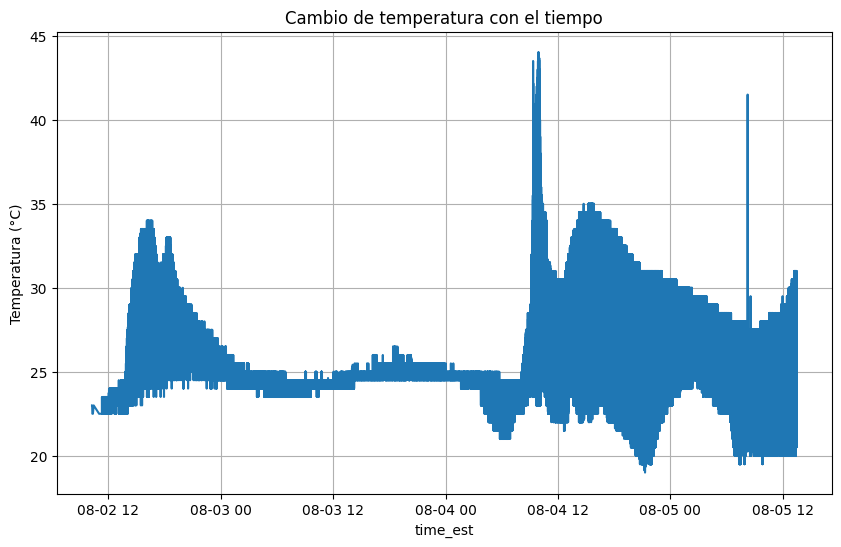

In [ ]:
# YOUR CODE HERE:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Paso 0: Importar los paquetes necesarios y cargar el archivo XLSX en un DataFrame
file_path = "/Assignment_1.xlsx"
pd.read_excel('/content/Assignment_1.xlsx')
df = pd.read_excel('Assignment_1.xlsx')

# Crear la visualización
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='time_est', y='Temperature_C')
plt.title('Cambio de temperatura con el tiempo')
plt.xlabel('time_est')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.show()

### Question 5:
* Visualize the lon lat data on a map to show how the case traveled.  You may incorporate any other additional information to make this more impactful. Imagine that this would be included in your presentation to the customer. (Non techical audience) (5 pts)

**Do not worry if this looks like non-sense on a map.  Ex:  The trip may appear to occur over water or in a forest because this is a toy dataset.**

In [ ]:
# YOUR CODE HERE:
import pandas as pd
import folium

# Paso 0: Importar los paquetes necesarios y cargar el archivo XLSX en un DataFrame
file_path = "/Asignment_1.xlsx"
df = pd.read_excel(file_path)

# Crear un mapa centrado en la primera ubicación
mapa = folium.Map(location=[df['Lat'].iloc[0], df['Lon'].iloc[0]], zoom_start=10)

# Añadir marcadores para cada ubicación
for index, row in df.iterrows():
    folium.Marker(location=[row['Lat'], row['Lon']], popup=f"{row['Site']} - {row['Zone']}",
                  icon=folium.Icon(color='blue', icon='info-sign')).add_to(mapa)

# Añadir una línea que conecte las ubicaciones en orden de tiempo
folium.PolyLine(locations=df[['Lat', 'Lon']].values, color='red', weight=2.5, opacity=0.7).add_to(mapa)

# Mostrar el mapa
mapa

# Part 3: Customer Questions


### Question 6:

The customer wants to understand the efficieny of ther DC operations.
* Based on what you see in the data, (all zones except for STORE), which parts of their operation are most & least "efficient? (10 pts)

In [ ]:
# YOUR CODE HERE
import pandas as pd

# Paso 0: Importar los paquetes necesarios y cargar el archivo XLSX en un DataFrame
file_path = "/Asignment_1.xlsx"
df = pd.read_excel(file_path)

# Paso 1: Filtrar las zonas que no sean TIENDA
df_dc = df[df['Zone'] != 'TIENDA']

# Paso 2: Calcular la duración del tiempo que pasa un caso en cada zona
df_dc['Time est'] = pd.to_datetime(df_dc['Time est'])  # Convertir la columna 'Hora est' a formato datetime
df_dc['Time salida'] = df_dc.groupby('Asset Type')['Time est'].shift(-1)  # Calcular la hora de salida
df_dc['Duracion'] = (df_dc['Time salida'] - df_dc['Time est']).dt.total_seconds() / 60  # Calcular la duración en minutos

# Paso 3: Calcular la duración promedio en cada zona
duracion_promedio_por_zona = df_dc.groupby('Zone')['Duracion'].mean().sort_values(ascending=False)

# Mostrar los resultados
print("Duración promedio en cada zona (minutos):")
print(duracion_promedio_por_zona)

YOUR TEXT ANSWER HERE

### Question 7:

The customer wants to understand the stocking efficiency in stores.
* Based on what you see in the data, how quickly did the store unload and stock the merchandise. (5 pts)
* How could this be converted in a KPI that a regional manager could track?  (5 pts)

In [ ]:
# YOUR CODE HERE
file_path = "/Asignment_1.xlsx"
df = pd.read_excel(file_path)

# Paso 1: Filtrar los datos de la tienda
df_tienda = df[df['Zone'] == 'TIENDA']

# Paso 2: Calcular la duración del tiempo de descarga y almacenamiento en la tienda
df_tienda['Time est'] = pd.to_datetime(df_tienda['Time est'])  # Convertir la columna 'Hora est' a formato datetime
df_tienda['Time salida'] = df_tienda.groupby('Asset ID')['Time est'].shift(-1)  # Calcular la hora de salida
df_tienda['Duracion'] = (df_tienda['Time salida'] - df_tienda['Time est']).dt.total_seconds() / 60  # Calcular la duración en minutos

# Paso 3: Calcular la velocidad de descarga y almacenamiento en la tienda (mercancía por minuto)
velocidad_descarga_almacenamiento = 1 / df_tienda['Duracion'].mean()

# Mostrar los resultados
print("Velocidad de descarga y almacenamiento en la tienda (mercancía por minuto):", velocidad_descarga_almacenamiento)

YOUR TEXT ANSWER HERE

### Question 8:

Please explain what you would ask for and what you will do with this data, given that you can talk with the following people (no code needed):


YOUR TEXT ANSWER HERE
* a. X
* b. Y

Para la persona X:
a. Pedir:
   - Detalles específicos sobre los procesos actuales de gestión de inventario en los centros de distribución y tiendas.
   - Información sobre los objetivos de eficiencia y rendimiento que la empresa espera alcanzar en sus operaciones de cadena de suministro.
b. Acciones:
   - Compartir los datos recopilados sobre la duración del tiempo que pasa un caso en cada zona de los centros de distribución, excluyendo la zona de tienda, para evaluar la eficiencia operativa.
   - Discutir posibles mejoras en los procesos de gestión de inventario en los centros de distribución basadas en los insights obtenidos de los datos.

Para la persona Y:
a. Pedir:
   - Detalles sobre los procesos de descarga y almacenamiento de mercancía en las tiendas.
   - Información sobre los KPIs que la empresa utiliza actualmente para evaluar la eficiencia del almacenamiento en las tiendas.
b. Acciones:
   - Compartir los datos sobre la velocidad de descarga y almacenamiento de la mercancía en las tiendas, expresada como mercancía por minuto.
   - Proponer la implementación de un nuevo KPI llamado "Velocidad de Descarga y Almacenamiento en la Tienda" para monitorear y mejorar la eficiencia del almacenamiento en las tiendas.
   - Solicitar comentarios y sugerencias sobre cómo mejorar el proceso de almacenamiento en las tiendas para aumentar la eficiencia y optimizar los resultados.

Es importante adaptar el enfoque y la discusión según el interés y el área de responsabilidad de cada persona (X y Y) para garantizar una comunicación efectiva y obtener el máximo valor de los datos.

## Part 4: Bonus Insights

### Question 8

The customer is open to hearing about additional insights you found in the data above and beyond what they asked for.
* Based on what you can see in the data, are there any other interesting insights that the customer may want to hear about? (Up to 15 bonus points)



In [ ]:
# YOUR CODE HERE
# Another metrics that could be interesting would be temperature by time

eventos_inusuales = df[df['Temperature_C'] > 30]
print("\nEventos inusuales de temperatura:")
print(eventos_inusuales)

# Idea 4: Comparación con objetivos predefinidos
objetivos_predefinidos = {
    'Duracion_minima_zona': {'DC_1': 10, 'DC_2': 15},
    'Velocidad_descarga_almacenamiento_objetivo': 0.5  # mercancía por minuto
}
# Comparar con objetivos predefinidos
for objetivo, valores in objetivos_predefinidos.items():
    print(f"\nComparación con el objetivo '{objetivo}':")
    if isinstance(valores, dict):
        for zona, objetivo_valor in valores.items():
            duracion_promedio = df[df['Zone'] == zona]['Duracion'].mean()
            print(f"Zone '{zona}': Duración promedio = {duracion_promedio} min, Objetivo = {objetivo_valor} min")
    else:
        velocidad_promedio = df['Velocidad_descarga_almacenamiento'].mean()
        print(f"Velocidad promedio = {velocidad_promedio} (mercancía por minuto), Objetivo = {valores} (mercancía por minuto)")

YOUR TEXT ANSWER HERE


In [1]:
from google.colab import files

# Descarga el archivo
files.download('Data_Analyst_Assignment_1.ipynb')

FileNotFoundError: Cannot find file: Data_Analyst_Assignment_1.ipynb